In [31]:
import numpy as np
import os
from IPython.display import clear_output
from time import time
import matplotlib.pyplot as plt

In [62]:
def generate_sequence(seed: int, seq: list) -> str:
    '''Takes unshuffled deck as input and outputs string version of shuffled deck.''' 
    
    np.random.seed(seed)
    np.random.shuffle(seq)
    return ''.join(map(str,seq))

#need to run with 1,000,000 iterations
def generate_data(n):
    '''Takes in number of simulations to be run, and shuffles deck n times'''

    # if(os.path.exists("deck_data.npy")):
    #     deck_data = np.load("deck_data.npy", allow_pickle = True)
    # else:
    time_per_iter = []
    deck_data = np.zeros((0, 2))
    seed = deck_data.shape[0]
    sequence = [1] * 26 + [0] * 26
    for x in (range(n)):
        if x%10000 == 0:
            start = time()
        np.random.seed(seed)
        shuffled_deck = generate_sequence(seed, sequence)
        new_row = np.array([seed, shuffled_deck], dtype=object)
        deck_data = np.vstack([deck_data, new_row])
        seed+=1
        if x%10000 == 9999:
            clear_output()
            print(x)
            time_per_iter += [(time() - start)]
    print('done')
    return deck_data, time_per_iter
    #np.save("deck_data.npy", deck_data)

In [66]:
deck_data, time_per_iter = generate_data(300000)

299999
done


In [67]:
time_per_iter

[0.7136650085449219,
 1.4338469505310059,
 2.238832712173462,
 2.9891908168792725,
 3.8785510063171387,
 4.929413795471191,
 6.009768962860107,
 7.559298038482666,
 8.8904869556427,
 10.737520217895508,
 12.545933246612549,
 14.022450923919678,
 15.892998933792114,
 18.847516298294067,
 21.204586029052734,
 25.00301218032837,
 27.49298882484436,
 30.00538206100464,
 31.651001691818237,
 33.60464096069336,
 33.016035079956055,
 35.77035403251648,
 35.66832375526428,
 36.65161609649658,
 40.12226724624634,
 40.790342807769775,
 40.65653896331787,
 42.220538854599,
 44.92324900627136,
 45.0460159778595]

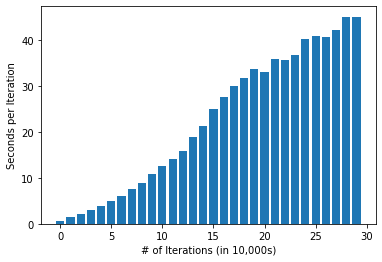

In [69]:
plt.bar(x = range(len(time_per_iter)),height = time_per_iter)
plt.xlabel("# of Iterations (in 10,000s)")
plt.ylabel("Seconds per Iteration")
plt.show()

In [39]:
#deck_data.shape

(10000, 2)

In [ ]:
def generate_data():
     np.random.seed(123)

results = []
for i in tqdm(range(1000000)):
    np.random.shuffle(deck)
    results += [int(''.join(deck),2)]

In [83]:
def generate_sequence(seed: int, seq: list) -> str:
    '''Takes unshuffled deck as input and outputs string version of shuffled deck.''' 
    
    np.random.seed(seed)
    np.random.shuffle(seq)
    return ''.join(seq)

In [86]:
def generate_data2(n):
    '''Takes in number of simulations to be run, and shuffles deck n times'''

    if(os.path.exists("deck_data.npy")):
         deck_data = np.load("deck_data.npy", allow_pickle = True)
         seeds = list(deck_data[0])
         decks = list(deck_data[1])
    else:
        seeds = []
        decks = []

    time_per_iter = []
    seed = len(seeds)
    sequence = ['1'] * 26 + ['0'] * 26

    for i in (range(n)):
        if i%10000 == 0:
            start = time()
        np.random.seed(seed)
        shuffled_deck = generate_sequence(seed, sequence)
        seeds += [seed]
        decks += [shuffled_deck]

        seed+=1
        if i%10000 == 9999:
            clear_output()
            print(i + 1)
            time_per_iter += [(time() - start)]
    deck_data = np.array([seeds, decks])
    
    print('done')
    return deck_data, time_per_iter

In [87]:
deck_data, time_per_iter = generate_data2(300000)

300000
done


In [89]:
deck_data

array([['0', '1', '2', ..., '299997', '299998', '299999'],
       ['0010100001110000110010011010101111001101110111001100',
        '1101111010100111011000011001100010101000101000110011',
        '0110111111010001110001000001101101100100010101001011', ...,
        '0100001001000011100110111011011010110101111100110000',
        '0101001011100110011010101011001110010110100101000110',
        '0100111001110101111001010011101100000001110001011001']],
      dtype='<U52')

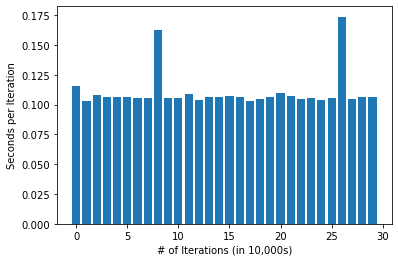

In [90]:
plt.bar(x = range(len(time_per_iter)),height = time_per_iter)
plt.xlabel("# of Iterations (in 10,000s)")
plt.ylabel("Seconds per Iteration")
plt.show()